<a href="https://colab.research.google.com/github/tamayodb/CCMADMACL_EXERCISES_COM222ML/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing(as_frame=True)

In [2]:
target = housing.target

In [5]:
features.head()

,Longitude,Latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85


In [4]:
features = housing.data[["Longitude", "Latitude"]]

In [6]:
df = pd.concat([features, target])
df

,Longitude,Latitude,MedHouseVal
0,-122.23,37.88,NaN
1,-122.22,37.86,NaN
2,-122.24,37.85,NaN
3,-122.25,37.85,NaN
4,-122.25,37.85,NaN
...,...,...,...
20635,NaN,NaN,0.781
20636,NaN,NaN,0.771
20637,NaN,NaN,0.923
20638,NaN,NaN,0.847


<Axes: xlabel='Longitude', ylabel='Latitude'>

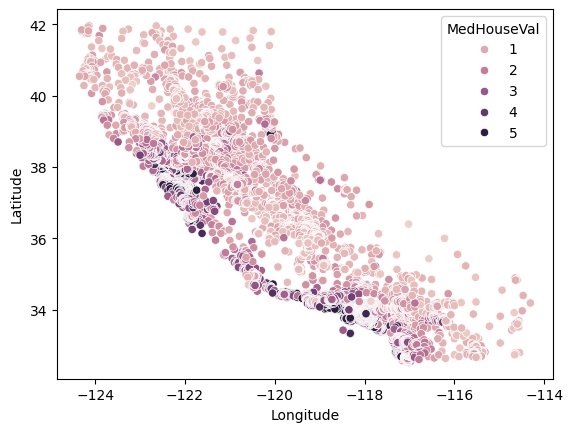

In [7]:
import seaborn as sns

sns.scatterplot(data = df, x = 'Longitude', y = 'Latitude', hue = 'MedHouseVal')

In [8]:
df['Latitude'].fillna(df['Latitude'].mean(), inplace=True)
df['Longitude'].fillna(df['Longitude'].mean(), inplace=True)

<ipython-input-8-bd68fb26486c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Latitude'].fillna(df['Latitude'].mean(), inplace=True)
<ipython-input-8-bd68fb26486c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['Latitude', 'Longitude']], df[['MedHouseVal']], test_size=0.33, random_state=0)

In [10]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=0)

<Axes: xlabel='Longitude', ylabel='Latitude'>

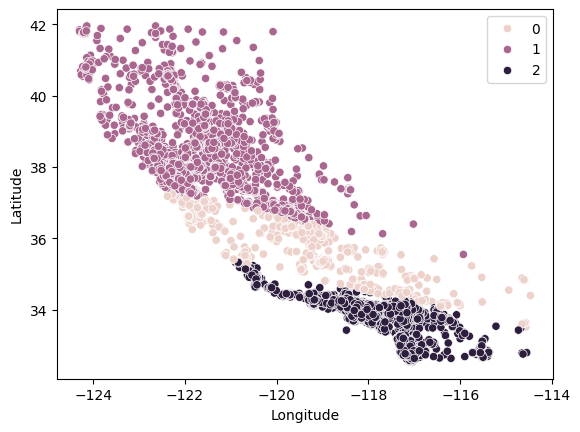

In [12]:
sns.scatterplot(data = X_train, x = 'Longitude', y = 'Latitude', hue = kmeans.labels_)

## Use the Elbow method to find the correct value of K

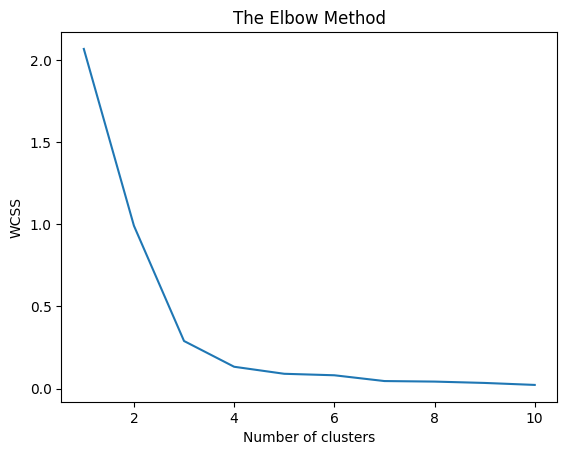

In [13]:
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0, n_init='auto')
    kmeans.fit(X_train_norm)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In the above plot, the elbow is at k=4 (the Sum of squared distances falls suddenly), indicating the optimal k for this dataset is 4.

Silhouette score for k=2: 0.651732124587807
Silhouette score for k=3: 0.7953524892052838
Silhouette score for k=4: 0.8259386401030385
Silhouette score for k=5: 0.8289046219321752
Silhouette score for k=6: 0.7877744162371612
Silhouette score for k=7: 0.7866385358662057
Silhouette score for k=8: 0.7793001538742506
Silhouette score for k=9: 0.7741809894944669
Silhouette score for k=10: 0.7727100699471694


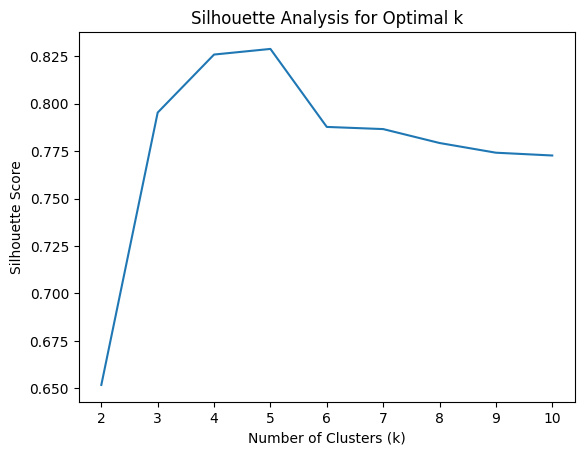

Optimal k based on Silhouette score: 5


In [14]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0, n_init='auto')
    kmeans.fit(X_train_norm)
    silhouette_avg = silhouette_score(X_train_norm, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette score for k={k}: {silhouette_avg}")

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Analysis for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

optimal_k = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal k based on Silhouette score: {optimal_k}")

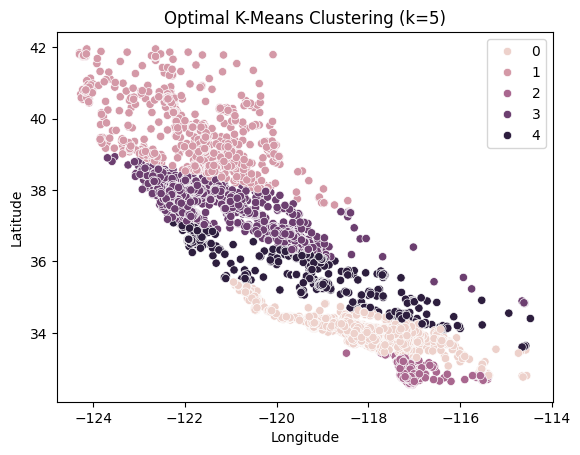

In [15]:
optimal_k = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=0, n_init='auto')
kmeans.fit(X_train_norm)
sns.scatterplot(data = X_train, x = 'Longitude', y = 'Latitude', hue = kmeans.labels_)
plt.title(f'Optimal K-Means Clustering (k={optimal_k})')
plt.show()